# LATIHAN

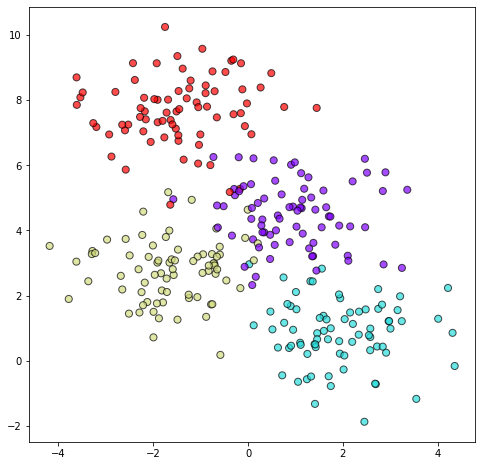

In [19]:
# NOMOR 1
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.figure(figsize=[8,8])
plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='black', alpha=.7,cmap='rainbow')


In [27]:

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200),
                        np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #create a color plot with the result
    n_classes = len(np.unique(y))
    contour = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap=cmap, clim=(y.min(), y.max()),
                         zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
            'age', 'label']

feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

def load_datasets(filename, col_names, dataset_path="datasets/"):
    csv_path = os.path.join(dataset_path, filename)
    return pd.read_csv(csv_path, skiprows=1, header=None, names=col_names)

In [2]:
# Features Selection
# split dataset in features and target variable
diabetesData = load_datasets('diabetes.csv', col_names)

diabetesData.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = diabetesData[feature_cols]
y = diabetesData.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred)

[0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]


In [5]:
from sklearn.metrics import accuracy_score

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.6753246753246753


# TUGAS 

In [6]:
# MINMAX SCALING

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_minmax, y_train)

y_pred = clf.predict(X_test_minmax)
print(y_pred)

from sklearn.metrics import accuracy_score
print("\naccuracy : ", accuracy_score(y_test, y_pred))

[0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]

accuracy :  0.6753246753246753


In [8]:
# NORMALIZED

from sklearn import tree

X_normalized =  preprocessing.normalize(X)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_norm, y_train_norm)

y_pred = clf.predict(X_test_norm)
print(y_pred)

from sklearn.metrics import accuracy_score
print("\naccuracy : ", accuracy_score(y_test_norm, y_pred))

[1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 1]

accuracy :  0.6320346320346321


In [9]:
import pandas as pd

heartData = pd.read_csv("datasets/heart.csv")
studentData = pd.read_csv("datasets/student-mat.csv")

colNames = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Xheart = heartData[colNames]
yheart = heartData.target

In [10]:
Xheart.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,145,233,1,0,150,0,2.3,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2
2,41,0,130,204,0,0,172,0,1.4,2,0,2
3,56,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
studentData.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split

decisionTree = tree.DecisionTreeClassifier()

X_trainHeart, X_testHeart, y_trainHeart, y_testHeart = train_test_split(Xheart, yheart, test_size=.2, random_state=1)

MinMaxScaler = preprocessing.MinMaxScaler()
X_trainHeart_minmax = MinMaxScaler.fit_transform(X_trainHeart)
X_testHeart_minmax = MinMaxScaler.transform(X_testHeart)

decisionTree.fit(X_trainHeart_minmax, y_trainHeart)

y_heartPred = decisionTree.predict(X_testHeart)
print(y_heartPred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_testHeart, y_heartPred))

0.5245901639344263


In [21]:
import graphviz

dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                     feature_names=colNames,  
                     class_names=True,
                     filled=True,
                     rounded=True,
                     special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render('Source', view=True)

'Source.pdf'